The primary goal in web automation has always been to create tools that don't break when websites change.

Foundational frameworks, with Selenium being the most notable, work by following direct commands. A developer writes a script with explicit, step-by-step instructions for the browser to follow. For example, a command might be, "find an element using its specific XPath or CSS selector," followed by another command to "click on it" or "type into it."

The fundamental weakness of this method is its brittleness. Websites are dynamic; their underlying code structure, the Document Object Model (DOM), is frequently updated by developers. Even a minor code change, like altering an element's ID or adjusting the page layout, can cause the script's selector to fail.

Once a selector breaks, the script cannot find its target element, and the entire automated process grinds to a halt. This creates a high maintenance burden, as scripts must be constantly fixed to keep up with website updates.

What if you could give a brain to your browser?

# **Browser Agents**

An AI browser agent is a software program enhanced with artificial intelligence that can perform web-based tasks autonomously, much like a human user would. These agents operate within a web browser, using LLMs, and computer vision to interact with websites in a way that mimics human behavior.

Instead of following a rigid, pre-written script like traditional automation tools, an AI browser agent is given a high-level goal in natural language, such as "Find the top tech articles today" or "Book the cheapest flight to New York". The agent then independently plans and executes the steps needed to achieve that goal.



## **How AI Browser Agents Work**

An AI browser agent's architecture allows it to perceive, reason, and act within a web environment:
*   **Perception (The "Eyes")** The agent "sees" a webpage using a combination of methods. It analyzes the structural data, like the HTML or Document Object Model (DOM), to understand the page's layout and identify interactive elements. It also uses computer vision to analyze screenshots, allowing it to identify elements based on their appearance, just as a person would. This dual approach makes it more resilient to website changes.

*   **Reasoning (The "Brain")** At its core is a Large Language Model (LLM), like GPT-4, which acts as the decision-making engine. The LLM interprets the user's goal, analyzes the data from the perception layer, and breaks the task down into a sequence of actions.

*   **Actuation (The "Hands")** To perform actions like clicking, typing, and scrolling, the agent uses an underlying browser automation framework, such as Playwright or Selenium. The LLM decides *what* to do, and the framework executes *how* to do it.

This process repeats in an "observe-decide-act" loop until the task is complete.



## **Key Capabilities and Use Cases**

AI browser agents are designed to handle dynamic and complex web interactions. Their primary functions include:
*   **Web Scraping and Data Extraction** They can navigate multiple pages to extract and structure information, such as product details or contact lists.
*   **Form Filling and Submission** Agents can intelligently fill out complex forms for tasks like signing up for services, applying for jobs, or getting insurance quotes.
*   **Cross-Application Workflows** They can automate tasks that span multiple websites, such as taking a new follower from LinkedIn and adding them as a lead in Salesforce.
*   **Complex Research** An agent can be tasked with open-ended research, like reading a CV, finding relevant jobs online, and saving them to a file.

# DON'T TRY TO RUN BROWSER-USE IN GOOGLE COLAB

In [ ]:
pip install playwright && playwright install chromium --with-deps
pip install browser-use

In [ ]:
!pip install playwright

In [ ]:
!playwright install chromium


In [ ]:
!pip install browser-use


## Installation

```python
pip install playwright && playwright install chromium --with-deps
pip install browser-use
```

## Setup your LLM

Create a .env file and add your API key. Start with a [free Gemini key](https://aistudio.google.com/app/u/1/apikey?pli=1).

```bash
touch .env
```

Add your key to .env file


```bash
GEMINI_API_KEY=
```

## Run your first browser agent

```python
from browser_use import Agent, ChatGoogle
from dotenv import load_dotenv
import asyncio

load_dotenv()

async def main():
    llm = ChatGoogle(model="gemini-2.5-flash")
    task = "Find the number 1 post on Show HN"
    agent = Agent(task=task, llm=llm)
    history = await agent.run()

if __name__ == "__main__":
    asyncio.run(main())
```

In [ ]:
import sys
!{sys.executable} -m pip install -U browser-use


In [ ]:
import asyncio
import sys
import nest_asyncio

# Allow async inside Jupyter
nest_asyncio.apply()

# Fix Windows asyncio subprocess NotImplementedError
if sys.platform.startswith("win"):
    asyncio.set_event_loop_policy(asyncio.WindowsProactorEventLoopPolicy())


In [1]:
import asyncio
asyncio.set_event_loop_policy(asyncio.WindowsProactorEventLoopPolicy())

import nest_asyncio
nest_asyncio.apply()

from browser_use import Agent, ChatGoogle
from dotenv import load_dotenv

load_dotenv()

async def main():
    llm = ChatGoogle(model="gemini-2.5-flash")
    task = "Open https://news.ycombinator.com and find the #1 post under Show HN"
    agent = Agent(task=task, llm=llm)
    history = await agent.run()
    print(history)

await main()


INFO     [service] Using anonymized telemetry, see https://docs.browser-use.com/development/telemetry.
INFO     [Agent] 🔗 Found URL in task: https://news.ycombinator.com, adding as initial action...
INFO     [Agent] 🎯 Task: Open https://news.ycombinator.com and find the #1 post under Show HN
INFO     [Agent] Starting a browser-use agent with version 0.11.9, with provider=google and model=gemini-2.5-flash
ERROR    [BrowserSession] [LocalBrowserWatchdog] Exception in on_BrowserLaunchEvent: 
Traceback (most recent call last):
  File "c:\Users\aqiba\AppData\Local\Programs\Python\Python311\Lib\site-packages\browser_use\browser\watchdogs\local_browser_watchdog.py", line 54, in on_BrowserLaunchEvent
    process, cdp_url = await self._launch_browser()
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aqiba\AppData\Local\Programs\Python\Python311\Lib\site-packages\browser_use\observability.py", line 73, in async_wrapper
    return await func(*args, **kwargs)
           ^^^^^^

NotImplementedError: 

In [ ]:
import sys
print(sys.version)


# Output Format

## Agent History

The `run()` method returns an `AgentHistoryList` object with the complete execution history:

```python
history = await agent.run()

# Access useful information
history.urls()                    # List of visited URLs
history.screenshot_paths()        # List of screenshot paths  
history.screenshots()             # List of screenshots as base64 strings
history.action_names()            # Names of executed actions
history.extracted_content()       # List of extracted content from all actions
history.errors()                  # List of errors (with None for steps without errors)
history.model_actions()           # All actions with their parameters
history.model_outputs()           # All model outputs from history
history.last_action()             # Last action in history

# Analysis methods
history.final_result()            # Get the final extracted content (last step)
history.is_done()                 # Check if agent completed successfully
history.is_successful()           # Check if agent completed successfully (returns None if not done)
history.has_errors()              # Check if any errors occurred
history.model_thoughts()          # Get the agent's reasoning process (AgentBrain objects)
history.action_results()          # Get all ActionResult objects from history
history.action_history()          # Get truncated action history with essential fields
history.number_of_steps()         # Get the number of steps in the history
history.total_duration_seconds()  # Get total duration of all steps in seconds

# Structured output (when using output_model_schema)
history.structured_output         # Property that returns parsed structured output
```

# Web-UI: Easiest Way to Use Browser-Use

Clone the repository:
```bash
git clone https://github.com/browser-use/web-ui.git
```

Navigate into the directory:
```bash
cd web-ui
```

Create the environment file (web-ui already provides you with a sample environment file):
```bash
cp .env.example .env
```

Open the newly created `.env` file in a text editor and add your API keys (like `GOOGLE_API_KEY`). You can also configure other settings as needed.

https://www.geeksforgeeks.org/devops/docker-tutorial/

Build the Docker Image:
```bash
docker build -t browser-use-webui .
```

Run the docker container (intel):
```bash
docker run -d --rm \
  -p 7788:7788 \
  -p 6080:6080 \
  --env-file .env \
  --name browser-use-container \
  browser-use-webui
```

Run the docker container (arm/apple silicon):

```bash
docker run -d --rm \
  --platform linux/arm64 \
  -p 7788:7788 \
  -p 6080:6080 \
  --env-file .env \
  --name browser-use-container \
  browser-use-webui
```

Explanation of the `docker run` flags:

  * `-d`: Detached mode. Runs the container in the background.
  * `--rm`: Automatically removes the container when it exits.
  * `-p 7788:7788`: Maps port `7788` on your local machine to port `7788` inside the container for the Web UI.
  * `-p 6080:6080`: Maps port `6080` on your local machine to port `6080` inside the container for the noVNC browser viewer.
  * `--env-file .env`: Loads the environment variables from your `.env` file into the container.
  * `--name browser-use-container`: Assigns a name to your running container for easy management.
  * `browser-use-webui`: The name of the image you want to run.



Access the Services:

After running the command, the services will be available at the following URLs on your local machine:

  * **Web-UI:** [http://localhost:7788](https://www.google.com/search?q=http://localhost:7788)
  * **VNC Viewer (to see the browser):** [http://localhost:6080/vnc.html](https://www.google.com/search?q=http://localhost:6080/vnc.html)


> Find me the most recent remote data scientist entry levels in India



# Examples

## Basic Search

```python
import asyncio
import os
import sys

from dotenv import load_dotenv

load_dotenv()

from browser_use import Agent, ChatGoogleGenerativeAI


async def main():
	# Instantiate the Google Gemini model
	llm = ChatGoogleGenerativeAI(model="gemini-pro")
	task = "Search Google for 'what is browser automation' and tell me the top 3 results"
	agent = Agent(task=task, llm=llm)
	await agent.run()


if __name__ == "__main__":
	asyncio.run(main())
```

## Form Filling

```python
import asyncio
import os
import sys

from dotenv import load_dotenv

load_dotenv()

# Import the Google Gemini model class
from browser_use import Agent, ChatGoogleGenerativeAI


async def main():
	# Initialize the Gemini model
	llm = ChatGoogleGenerativeAI(model="gemini-pro")

	# Define a form filling task
	task = """
    Go to https://httpbin.org/forms/post and fill out the contact form with:
    - Customer name: John Doe
    - Telephone: 555-123-4567
    - Email: john.doe@example.com
    - Size: Medium
    - Topping: cheese
    - Delivery time: now
    - Comments: This is a test form submission
    
    Then submit the form and tell me what response you get.
    """

	# Create and run the agent
	agent = Agent(task=task, llm=llm)
	await agent.run()


if __name__ == '__main__':
	asyncio.run(main())

```

## Data Extraction

```python
import asyncio
import os
import sys

from dotenv import load_dotenv

load_dotenv()

# Import the Google Gemini model class
from browser_use import Agent, ChatGoogleGenerativeAI


async def main():
	# Initialize the Gemini model
	llm = ChatGoogleGenerativeAI(model="gemini-pro")

	# Define a data extraction task
	task = """
    Go to https://quotes.toscrape.com/ and extract the following information:
    - The first 5 quotes on the page
    - The author of each quote
    - The tags associated with each quote
    
    Present the information in a clear, structured format like:
    Quote 1: "[quote text]" - Author: [author name] - Tags: [tag1, tag2, ...]
    Quote 2: "[quote text]" - Author: [author name] - Tags: [tag1, tag2, ...]
    etc.
    """

	# Create and run the agent
	agent = Agent(task=task, llm=llm)
	await agent.run()


if __name__ == '__main__':
	asyncio.run(main())
```

## Multi-Step Task List

```python

import asyncio
import os
import sys
from pathlib import Path


from dotenv import load_dotenv

load_dotenv()

# Import the Google Gemini model class
from browser_use import Agent, ChatGoogleGenerativeAI


async def main():
	# Initialize the Gemini model
	llm = ChatGoogleGenerativeAI(model="gemini-pro")

	# Define a multi-step task
	task = """
    I want you to research Python web scraping libraries. Here's what I need:
    
    1. First, search Google for "best Python web scraping libraries 2025"
    2. Find a reputable article or blog post about this topic
    3. From that article, extract the top 3 recommended libraries
    4. For each library, visit its official website or GitHub page
    5. Extract key information about each library:
        - Name
        - Brief description
        - Main features or advantages
        - GitHub stars (if available)
    
    Present your findings in a summary format comparing the three libraries.
    """

	# Create and run the agent
	agent = Agent(task=task, llm=llm)
	await agent.run()


if __name__ == '__main__':
	asyncio.run(main())
```

# Run any of the above examples in your local machine using web-ui, and provide the json/gif.

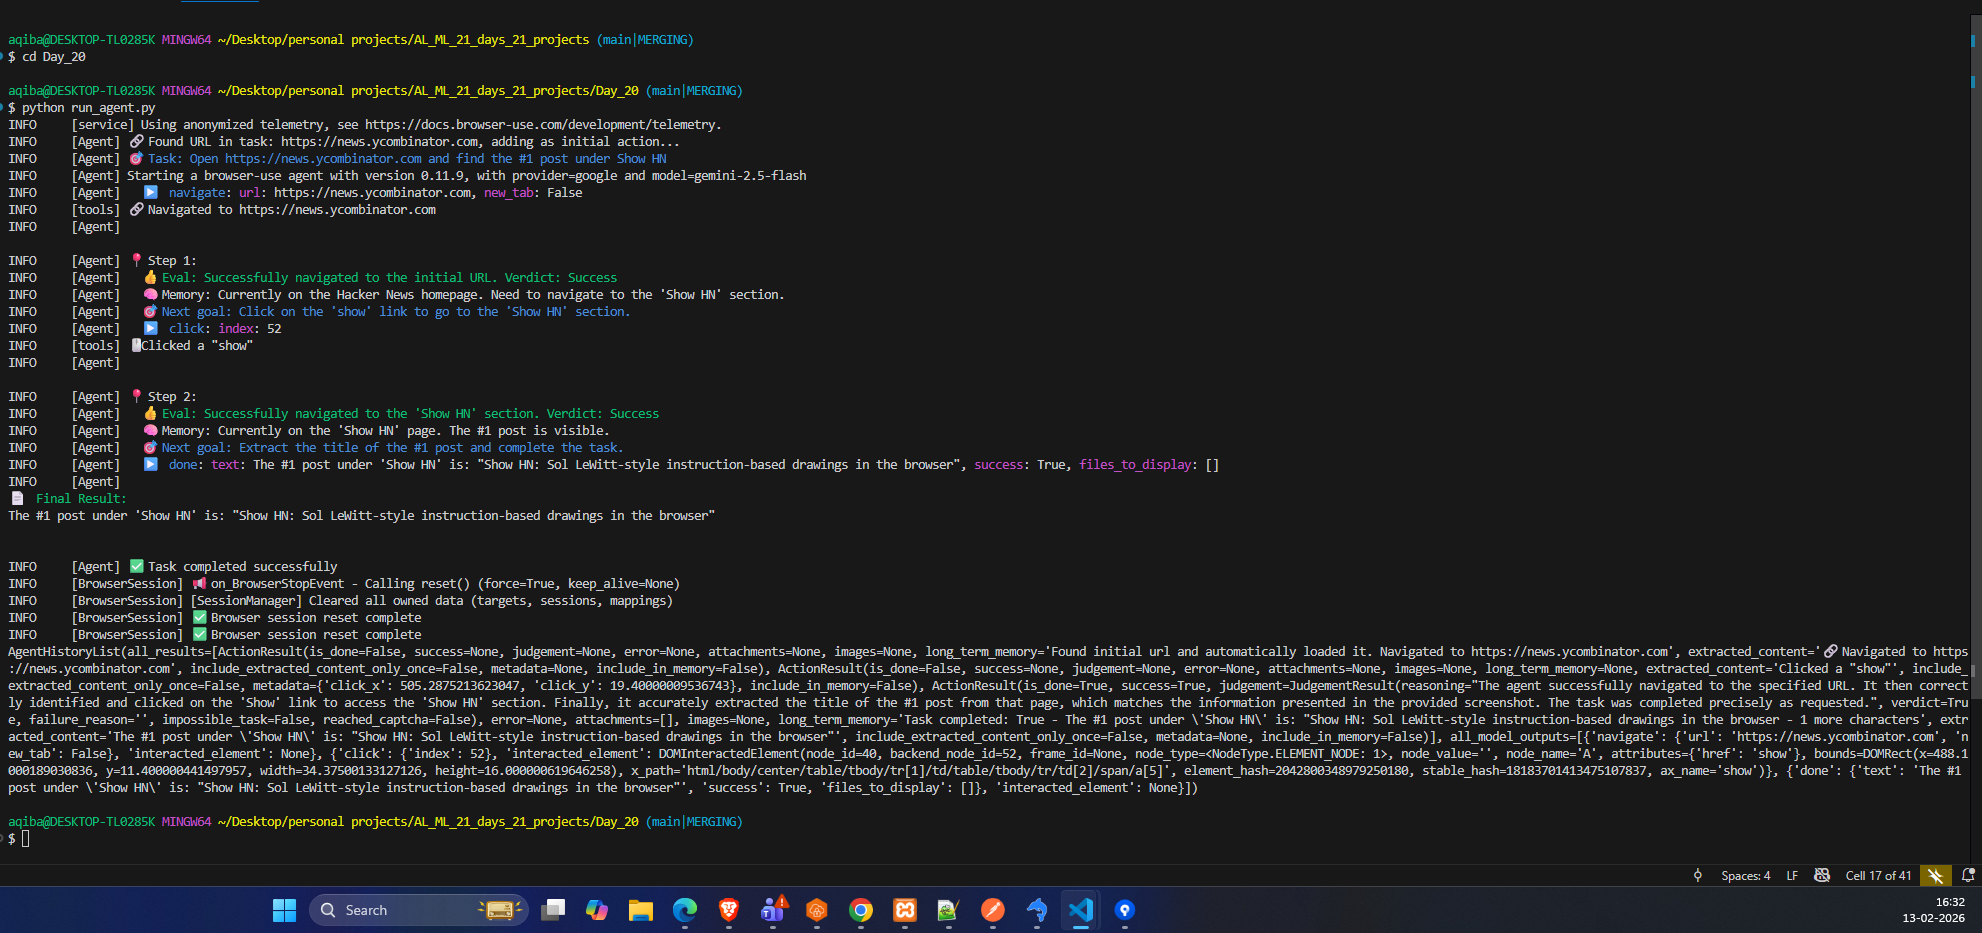